# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [72]:
#%matplotlib notebook
%matplotlib inline
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [34]:
inDir =  '/home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/1M/'
#inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/raw_data/300KW/'


print('The input dir is: %s'%inDir)



The input dir is: /home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/1M/


In [35]:
#ls /home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/1M/

In [36]:
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/304841_Kim/Results/'
#outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Yugang/'
outDir = create_fullpath(  outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/304841_Kim/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/304841_Kim/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/304841_Kim/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [37]:
username_ = 'Kim'

#flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
flist = ls_dir( inDir, and_list=[ username_   ], or_list = [ ])

#_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs
flists = sorted( flist )
#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = flists
 
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 630 files for user: Kim in this run.


In [38]:
flist

array(['Kim_2021C1_B22_0.0800deg_waxsP52.00_x-37500.00_expt1s_sid00263851_000001_SAXS.tif',
       'Kim_2021C1_F59_0.1500deg_waxsN52.00_x500.00_expt1s_sid00268198_000001_SAXS.tif',
       'Kim_2021C1_F50_0.0800deg_waxsP52.00_x-22000.00_expt1s_sid00267124_000001_SAXS.tif',
       'Kim_2021C1_E48_0.0800deg_waxsP52.00_x-10500.00_expt1s_sid00266945_000001_SAXS.tif',
       'Kim_2021C1_F50_0.0800deg_waxsP52.00_x-23000.00_expt1s_sid00267118_000001_SAXS.tif',
       'Kim_2021C1_C27_0.1000deg_waxsN52.00_x-9500.00_expt1s_sid00264217_000001_SAXS.tif',
       'Kim_2021C1_B13_0.1500deg_waxsN52.00_x-18000.00_expt1s_sid00262986_000001_SAXS.tif',
       'Kim_2021C1_A3_0.0800deg_waxsN52.00_x41100.00_expt1s_sid00262107_000001_SAXS.tif',
       'Kim_2021C1_C31_0.1500deg_waxsN52.00_x15500.00_expt1s_sid00265382_000001_SAXS.tif',
       'Kim_2021C1_B16_0.1000deg_waxsP52.00_x-36000.00_expt1s_sid00263321_000001_SAXS.tif',
       'Kim_2021C1_C31_0.1000deg_waxsN52.00_x15500.00_expt1s_sid00265381_000001_SAXS.ti

In [39]:
flists_clean

['Kim_2021C1B17_0.0800deg_waxsN52.00_x-40000.00_expt1s_sid00263342_000001_SAXS.tif',
 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-40500.00_expt1s_sid00263339_000001_SAXS.tif',
 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-41000.00_expt1s_sid00263336_000001_SAXS.tif',
 'Kim_2021C1B17_0.1000deg_waxsN52.00_x-40000.00_expt1s_sid00263343_000001_SAXS.tif',
 'Kim_2021C1B17_0.1000deg_waxsN52.00_x-40500.00_expt1s_sid00263340_000001_SAXS.tif',
 'Kim_2021C1B17_0.1000deg_waxsN52.00_x-41000.00_expt1s_sid00263337_000001_SAXS.tif',
 'Kim_2021C1B17_0.1500deg_waxsN52.00_x-40000.00_expt1s_sid00263344_000001_SAXS.tif',
 'Kim_2021C1B17_0.1500deg_waxsN52.00_x-40500.00_expt1s_sid00263341_000001_SAXS.tif',
 'Kim_2021C1B17_0.1500deg_waxsN52.00_x-41000.00_expt1s_sid00263338_000001_SAXS.tif',
 'Kim_2021C1_A1_0.0800deg_waxsP52.00_x51500.00_expt1s_sid00261993_000001_SAXS.tif',
 'Kim_2021C1_A1_0.0800deg_waxsP52.00_x52000.00_expt1s_sid00261996_000001_SAXS.tif',
 'Kim_2021C1_A1_0.0800deg_waxsP52.00_x52500.00_expt1s_sid00261999_0

### Using a two-layered dict to sort the files 

In [40]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [43]:
cut_pattern= r'(_waxs)'
#cut_pattern= r'(_0.)'
sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys())
N = len(ks)
print( 'There are %s samples.'%(N))

There are 210 samples.


In [42]:
# import shutil
# inDir
# outDirM = '/home/group/NSLSII_Data/SMI/2021_Cycle1/304841_Kim/Deleted/'



# delts= [        '2021C1_C28','2021C1_C29',
#                    '2021C1_C30','2021C1_C31','2021C1_C32', '2021C1_C33',
#                     '2021C1_D34','2021C1_D35','2021C1_D36', '2021C1_D37', ]
# probs = []
# for k in ks:
#     for d in delts:
#         if d in k:
#             probs.append( k )

    



# for p in probs:
#     fps = sam_dict[ p ] 
#     for fp in fps:
#         sid = int( fp[-24: - 16] )
#         if sid < 265180:
#             original = inDir + fp
#             target = outDirM + fp
#             print(fp)
#             shutil.move(original,target)

In [44]:
sams

{'Kim_2021C1B17_0.0800deg': 3,
 'Kim_2021C1B17_0.1000deg': 3,
 'Kim_2021C1B17_0.1500deg': 3,
 'Kim_2021C1_A1_0.0800deg': 3,
 'Kim_2021C1_A1_0.1000deg': 3,
 'Kim_2021C1_A1_0.1500deg': 3,
 'Kim_2021C1_A2_0.0800deg': 3,
 'Kim_2021C1_A2_0.1000deg': 3,
 'Kim_2021C1_A2_0.1500deg': 3,
 'Kim_2021C1_A3_0.0800deg': 3,
 'Kim_2021C1_A3_0.1000deg': 3,
 'Kim_2021C1_A3_0.1500deg': 3,
 'Kim_2021C1_A4_0.0800deg': 3,
 'Kim_2021C1_A4_0.1000deg': 3,
 'Kim_2021C1_A4_0.1500deg': 3,
 'Kim_2021C1_A5_0.0800deg': 3,
 'Kim_2021C1_A5_0.1000deg': 3,
 'Kim_2021C1_A5_0.1500deg': 3,
 'Kim_2021C1_A6_0.0800deg': 3,
 'Kim_2021C1_A6_0.1000deg': 3,
 'Kim_2021C1_A6_0.1500deg': 3,
 'Kim_2021C1_A7_0.0800deg': 3,
 'Kim_2021C1_A7_0.1000deg': 3,
 'Kim_2021C1_A7_0.1500deg': 3,
 'Kim_2021C1_A8_0.0800deg': 3,
 'Kim_2021C1_A8_0.1000deg': 3,
 'Kim_2021C1_A8_0.1500deg': 3,
 'Kim_2021C1_B10_0.0800deg': 3,
 'Kim_2021C1_B10_0.1000deg': 3,
 'Kim_2021C1_B10_0.1500deg': 3,
 'Kim_2021C1_B11_0.0800deg': 3,
 'Kim_2021C1_B11_0.1000deg': 3,
 'K

In [45]:
ks[0], sam_dict[ks[0]]

('Kim_2021C1B17_0.0800deg',
 ['Kim_2021C1B17_0.0800deg_waxsN52.00_x-40000.00_expt1s_sid00263342_000001_SAXS.tif',
  'Kim_2021C1B17_0.0800deg_waxsN52.00_x-40500.00_expt1s_sid00263339_000001_SAXS.tif',
  'Kim_2021C1B17_0.0800deg_waxsN52.00_x-41000.00_expt1s_sid00263336_000001_SAXS.tif'])

##  Load Mask if has one

<IPython.core.display.Javascript object>


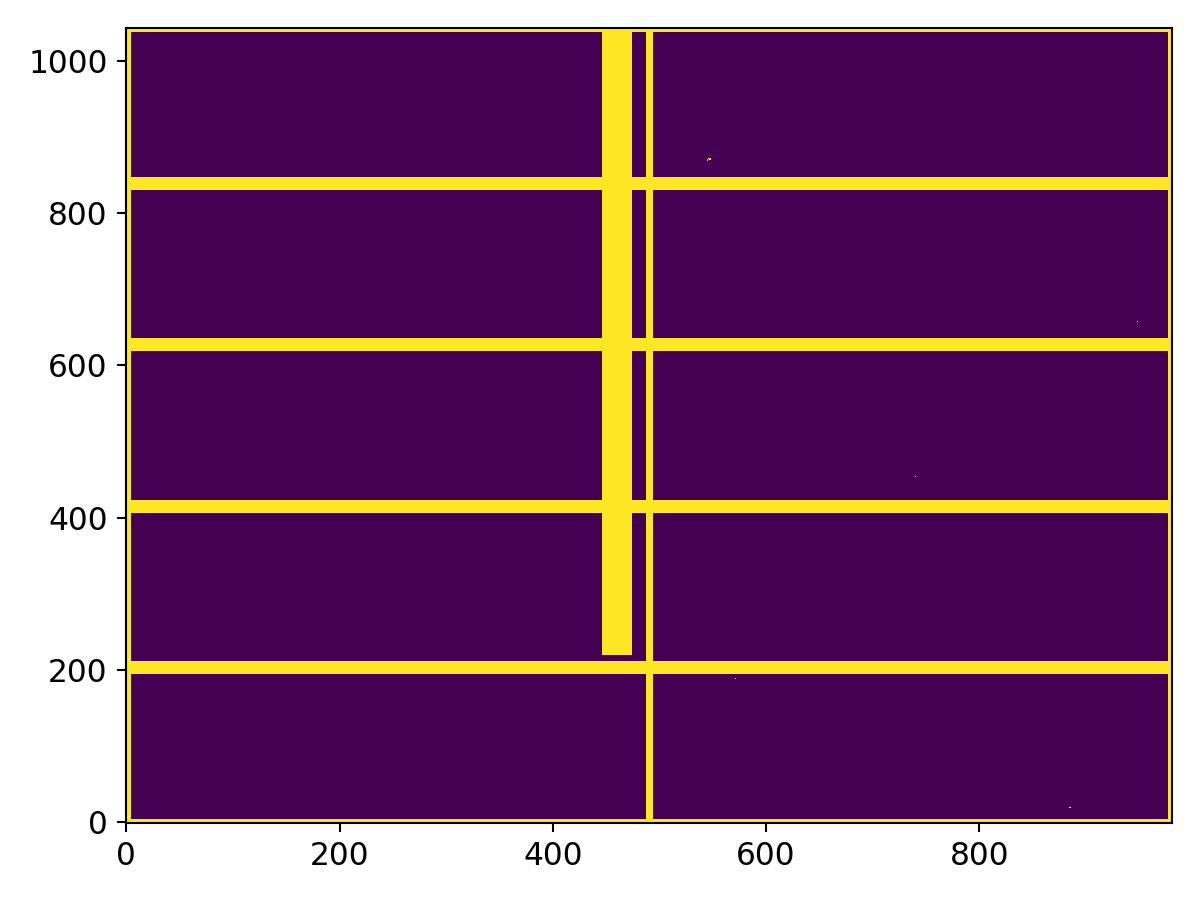

In [47]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/Mask/mask_saxs_2021_C1.npy')

show_img(mask)




## Define data analysis parameters and methods

### A GiSAXS

In [48]:
username = 'Kim'
beamline = 'SMI'
cycle='2021_C1'


geometry   =  'Reflection'
det_str =  'Pilatus1m'

wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 5000.00
b_xy = [ 459, 567 ]
bs_xy = bs=[ 459+1, 220  ]

 
incident_angle = 0
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
   
## Setup the class
SC = SMI_Scattering( pargs_sc  )
 


### Methods

In [53]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  


if T:    
    ###########################
    #for GiSAXS
    ###########################  
    do_plot_raw = F # True
    do_qimg = T
    
    do_linecut_qz = F #do qz-linecut, if qz_cuts is none, make cut at Yoneda wing
    qz_cuts= None # [0.04, 0.08, 0.15 ]
    q_wid = 0.0025  
    ang_ctl = 0.112  #for Si wafer at 16.1 keV 
    show_linecut_qz =   F
    do_linecut_qr = F #do qx-linecut
    qr_cuts= None # [0.04, 0.08, 0.15 ]
    show_linecut_qr =   F   
    
    
    
 
    

In [54]:
sample_list = ks[ : ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list, sam_dict[sample_list[0]]  )

['Kim_2021C1B17_0.0800deg'] ['Kim_2021C1B17_0.0800deg_waxsN52.00_x-40000.00_expt1s_sid00263342_000001_SAXS.tif', 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-40500.00_expt1s_sid00263339_000001_SAXS.tif', 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-41000.00_expt1s_sid00263336_000001_SAXS.tif']


In [55]:
#ks

In [56]:
#sample_list,  sam_dict[sample_list[0]]

In [57]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

# Run the data analysis

The sample is: Kim_2021C1B17_0.0800deg.
The filelist for this sample is: ['Kim_2021C1B17_0.0800deg_waxsN52.00_x-40000.00_expt1s_sid00263342_000001_SAXS.tif', 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-40500.00_expt1s_sid00263339_000001_SAXS.tif', 'Kim_2021C1B17_0.0800deg_waxsN52.00_x-41000.00_expt1s_sid00263336_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/304841_Kim/Results/GISAXS/  already exists
The incident angle is: 0.08.


<IPython.core.display.Javascript object>


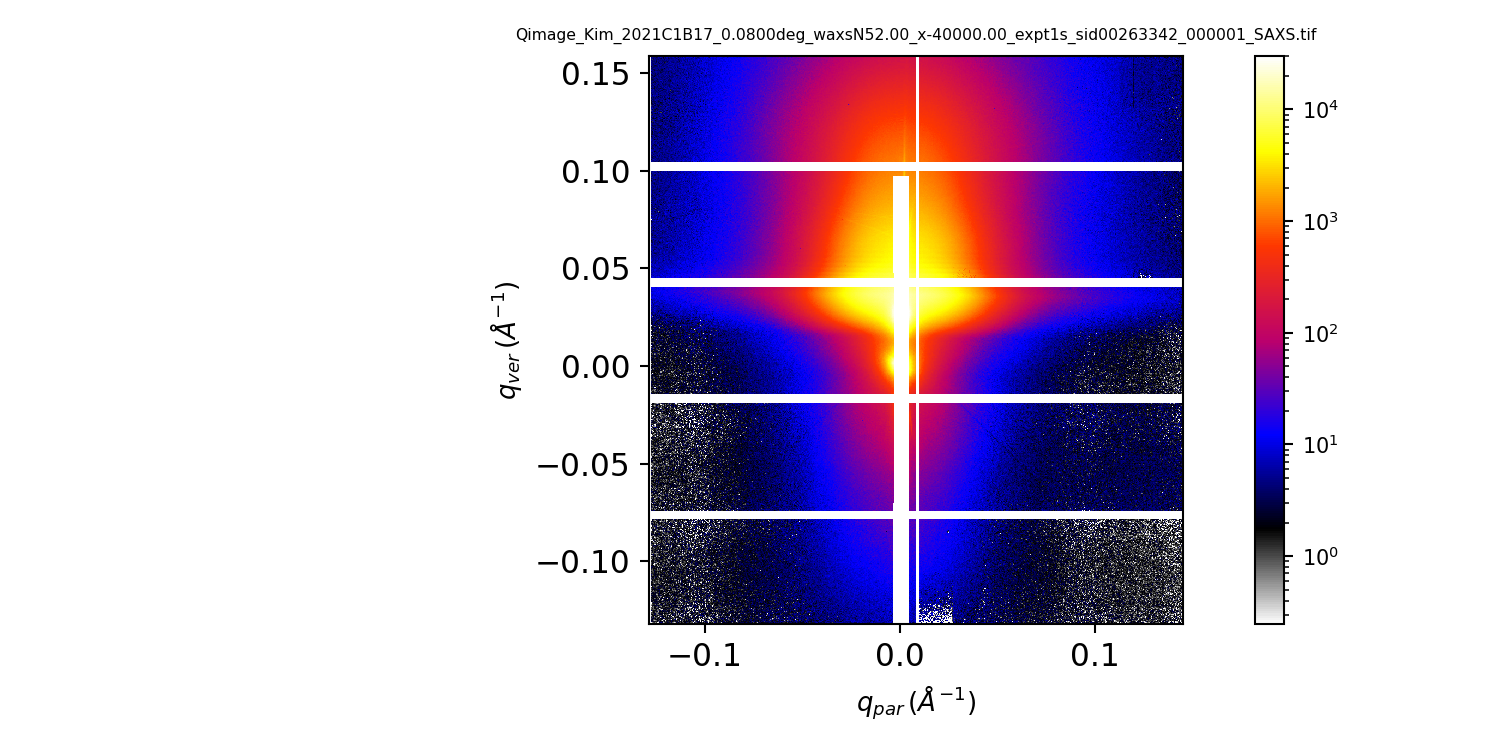

<IPython.core.display.Javascript object>


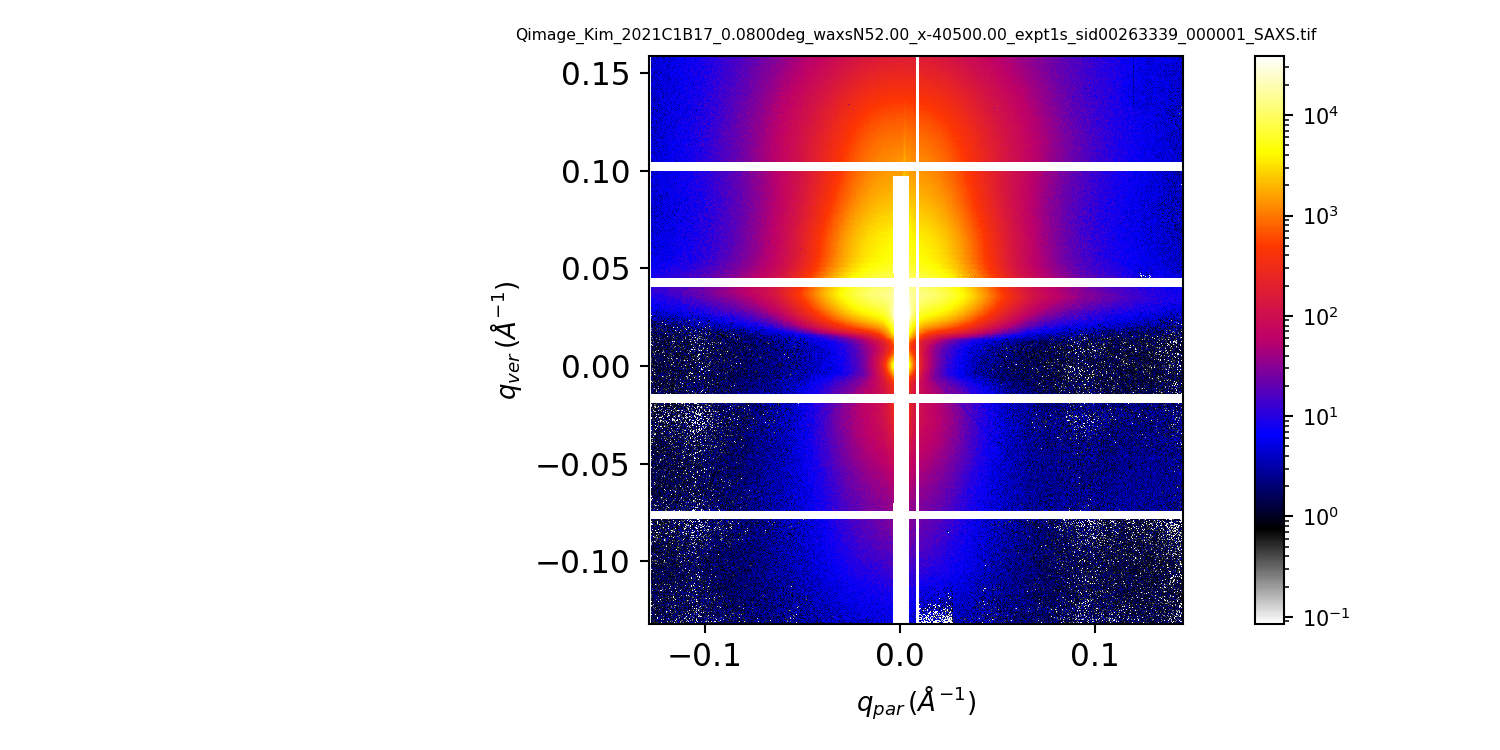

<IPython.core.display.Javascript object>


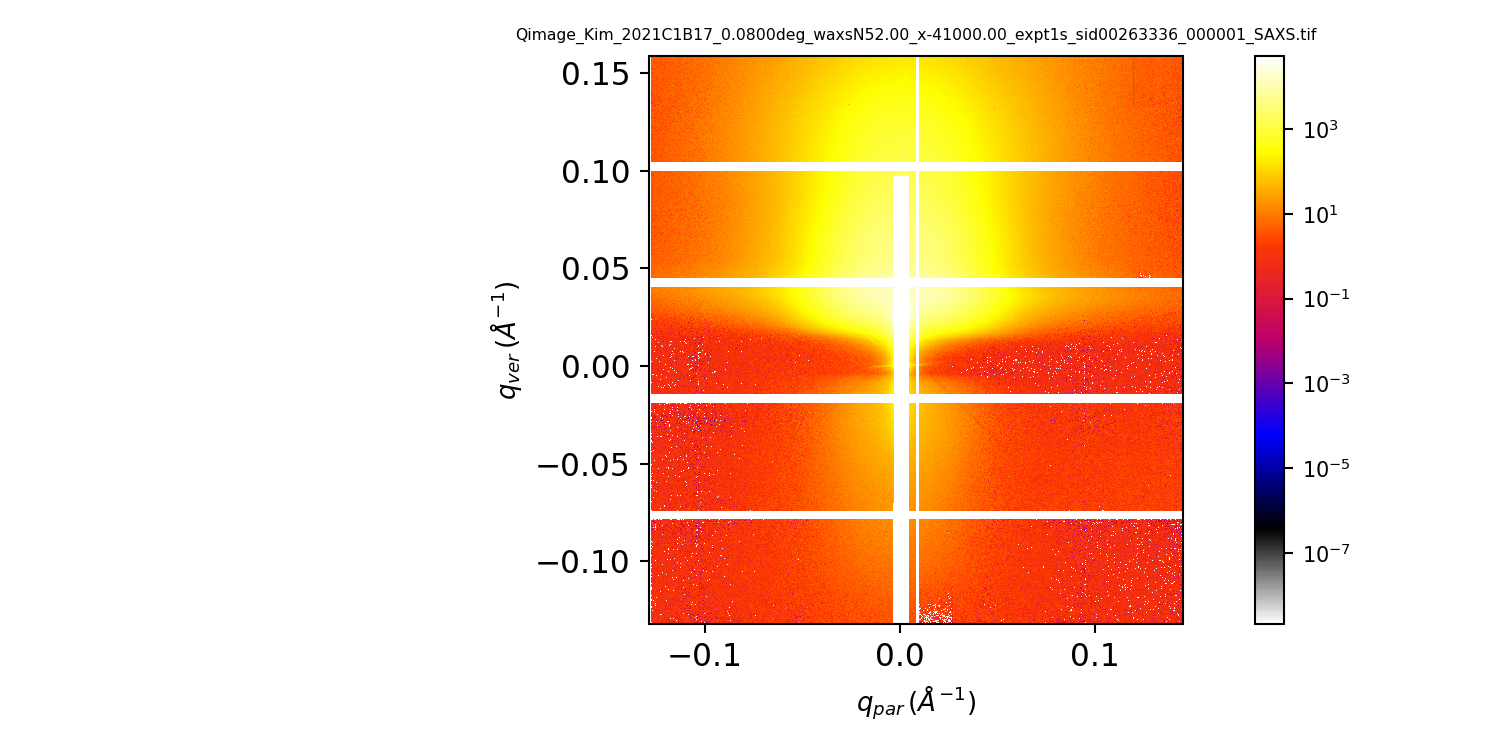

Done


In [58]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'GISAXS'
    RES['Data'] = {}
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.   
    
    p0 = re.search( r'([d][e][g])', sam  ).span()[0]
    inc = float( sam[ p0-6:p0] )
    print('The incident angle is: %s.'%inc)
    pargs_sc['incident_angle'] = inc  
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}   
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=None, fontsize=6, )  
        #######################################
        #Do conversion to q-space
        ########################################              
        if do_qimg:
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None,mask= mask, x='Qr', y='Qz', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i , zlim=[0.1,1] )   
        #######################################
        # Do hor-linecut  ( cut at onstant qz)
        ########################################             
        if do_linecut_qz:
            if qz_cuts is None:
                qYo = round(  4*np.pi/(wav_m * 1e10) * np.deg2rad(   (ang_ctl + float(inc) )/2   ), 4 )
                SC.md['qYoneda'] = qYo 
                qz_cuts=[ qYo  ]
            qiqs_lcqz = SC.qimg_linecut_qzs( qimg , qx_range=qx, qz_range=qz,
                                  qz_cuts=qz_cuts, qz_wid=q_wid,Qrange=[qx.min(), qx.max()], mask= ~SC.qimg_mask  )  
            run_save_linecuts( SC, ki=None, dtype = 'Linecut_Hor'  ) 
            run_plot_linecuts( SC, ki=None, dtype = 'Linecut_Hor'  )
            if show_linecut_qz:
                run_plot_img_with_linecuts( SC,  ki=None, zlim=[0.1,1], dtype = 'Linecut_Hor'  )
        #######################################
        # Do ver-linecut  ( cut at onstant qr)
        ########################################             
        if do_linecut_qr:
            if qr_cuts is None:
                qYo = round(  4*np.pi/(wav_m * 1e10) * np.deg2rad(   (ang_ctl + float(inc) )/2   ), 4 )
                SC.md['qYoneda'] = qYo 
                qr_cuts=[ qYo  ] 
            qiqs_lcqx = SC.qimg_linecut_qxs( qimg , qx_range=qx, qz_range=qz,
                         qx_cuts=[ qYo  ],qx_wid=q_wid,Prange=[qz.min(), qz.max()], mask= ~SC.qimg_mask  )  
            run_save_linecuts( SC, ki=None, dtype = 'Linecut_Ver'  ) 
            run_plot_linecuts( SC, ki=None, dtype = 'Linecut_Ver'  ) 
            if show_linecut_qr:
                run_plot_img_with_linecuts( SC,  ki=None, zlim=[0.1,1], dtype = 'Linecut_Ver'  )     
       ## save data to h5 file 
        res = SC.res_to_dict( save_raw=save_raw, do_qimg=do_qimg, do_linecut_qz =do_linecut_qz,
                          do_linecut_qx=do_linecut_qr, )  
        RES['Data'][ SC.md['filenames'][i] ] = res 
 
    K='saved_data';SC.md[K] = SC.saved_data
    K='saved_plots';SC.md[K] = SC.saved_plots    
    RES['md']= SC.md  
    
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')                
        
        
        
        
        

# THE END

In [19]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/packages.py